# Review

### 로지스틱 회귀의 이진 분류
### 로지스틷 회귀 분석 이용한 질병 진단
### 결정 트리의 다중 분류
### 결정 트리 분석을 아용한 움직임 분류

#### 로지스틱 회귀 :  분류에 사용 (선형회귀 : 직선의 방정식, 로지스틱 : 곡선의 방정식) 
#### S자 함수 --> True(0) / False(1)
#### 시그모이드 함수 : 로지스틱 회귀에 사용하는 S자 함수
#### y = 1 / (1 + e*(ax+b))
#### 공부시간 1 5 10 15 20 --> 40, 55, 65, 70, 80 --> 선형 회귀
#### 공부시간 1 5 10 15 20 --> 불합격, 불합격, 불합격, 합격, 합격 --> 로지스틱 회귀 S자 함수
#### 선형 회귀 모델은 실제값과 예측값의 오차에 기반한 지표를 사용 : mse, rmse, r2score
#### 로지스틱 회귀 모델은 이진 분류 결과를 평가하기 위해 오차 행렬 : 정밀도, 재현률, F1스코어, ROC커브 사용(시각화를 통해 판단) 

## 오차행렬(Confusion Matrix) - 엑셀자료 참고
### ROC 기반 AUC 스코어
### 오차 행렬의 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선
### FPR : 실제 Negative인 데이터를 Positive로 거짓(False)으로 예측한 비율
### TPR : 실제 Positive인 데이터를 Positive로 참(True)으로 예측한 비율
### FPR = ( FP / (FP + TN) ) --> 1에 가까울수록 성능이 좋음
### 사이킷런에서 roc_auc_score 함수 제공

In [6]:
from IPython.display import Image # 사진 첨부할 때
Image(url='https://raw.githubusercontent.com/bigdataleeky/python/main/confusion_matrix.PNG', width=500)
# image(filename='D:/confusion_matrix.PNG', width=500)

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [8]:
b_cancer = load_breast_cancer()

In [9]:
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
b_cancer_df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)
b_cancer_df['diagnosis'] = b_cancer.target # 'diagnosis' column 추가
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
b_cancer_df.shape

(569, 31)

In [12]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### column의 개수(feature)가 너무 많으면 scaling 해 주어야 함  *(정확도 높이기 위함)

In [13]:
from sklearn.preprocessing import StandardScaler # 평균이 0 분산이 1이 되는 정규분포형태의 데이터
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
ss = StandardScaler()
lr = LogisticRegression()

In [14]:
# b_cancer_scaled = ss.fit_transform(b_cancer_df) # scaled data

In [15]:
# b_cancer_scaled[0]

In [16]:
# 데이터 분류
y = b_cancer_df['diagnosis']
y.shape

(569,)

In [17]:
x = b_cancer_df.drop(['diagnosis'], axis=1, inplace=False)
x.shape

(569, 30)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

In [19]:
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.fit_transform(x_test)
x_train_scaled.shape, x_test_scaled.shape # 학습용, 검증용

((398, 30), (171, 30))

In [20]:
lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [21]:
# 예측값 구하기
y_predict = lr.predict(x_test_scaled)

In [22]:
# 성능확인
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [23]:
# 오차행렬
confusion_matrix(y_test, y_predict)

array([[ 61,   2],
       [  4, 104]], dtype=int64)

In [24]:
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, y_predict)

In [25]:
print(f"정확도 : {accuracy:.3f}\n정밀도 : {precision:.3f}\n재현율 : {recall:.3f}\nf1     : {f1:.3f}\nroc_auc : {roc_auc:.3f}")
# 기계적인 성능을 측정할 때에는 이도 좋은 수치라고 할 수 있지만
# 의료계에서는 보다 더 보수적으로 측정함 (기준이 더 높음)

정확도 : 0.965
정밀도 : 0.981
재현율 : 0.963
f1     : 0.972
roc_auc : 0.966


### 센서데이터 움직임 확인 
### --> 결정트리, 정보이득지수, 지니계수, Graphviz 패키지

In [26]:
# 결정트리 --> 스무고개 (다중분류에 많이 사용)
# 까치 펭귄 개구리 다람쥐 호랑이

In [27]:
# 실제 적용해 보기

# 정보이득지수
#### 정보이득 : 엔트로피 개념을 기반
#### 엔트로피 : 데이터 집합의 혼잡도 / 확률분포의 모양을 설명하는 특징값이며 확률분포가 가지고 있는 정보의 양을 나타내는 값
#### 데이터 집합에 다른 데이터 = 균일도가 떨어짐 --> 혼잡도가 높아, 엔트로피도 높아짐
#### 데이터 집합에 같은 데이터 = 균일도가 높아짐 --> 혼잡도가 낮아, 엔트로피도 낮아짐

#### 정보이득지수 : 혼잡도가 줄어들어 얻게 되는 이득  '  1 - 엔트로피 '
#### *정보이득지수와 엔트로피는 반비례관계*
#### 결정트리 : 정보이득 지수가 높은 피처를 분할 기준으로 삼음

# 지니 계수
#### 소득의 불균형 정도를 나타냄 --> 머신러닝에서는 데이터의 순도를 나타냄
#### 지니 계수가 0이면 완전 순수한 데이터 집합인 셈
#### (순수한 데이터 : 편차가 작다 OR 이것저것 섞이지 않은 하나의 범주로 이루어진 데이터)
#### *지니 계수와 순도는 반비례관계 (지니 계수가 높을수록 순도가 낮은 데이터 집합)*

In [28]:
# 피처 read
feature_name_df = pd.read_csv('C:/Users/pc/_MachineLearning/uci/UCI_HAR_Dataset/features.txt', sep='\s+',
                             header=None, names=['index','feature_name'])
# feature_name_df['feature_name']

# 데이터 집합에서 중복을 확인하고 
# 중복을 찾아 제거
# 중복을 찾아 변경
# 데이터 프레임 / 리스트 / 넘파이 배열 / 배열

In [29]:
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [30]:
feature_name_df.to_csv('C:feature_name.csv')

In [31]:
# 위 방법 error 발생 시 Github에서 csv 파일 이용하기
df = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/20220308/UCI%20HAR%20Dataset/feature_name.csv")
feature_name_df = df.iloc[:,1:]
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [32]:
feature_name_df.shape

(561, 2)

In [33]:
# 판다스는 0.24.2 버전보다 높을 때 feature가 동일하면 중복 Error 발생
pd.__version__

'1.3.4'

In [34]:
561 - len(set(feature_name_df['feature_name']))
# 84개의 데이터가 중복됨

84

In [35]:
# column명 바꿔 주기
# - cumcount 함수 이용

feature_name_df.groupby('feature_name').count().head(10) # 중복 데이터 출력

,index
feature_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
"angle(tBodyGyroJerkMean,gravityMean)",1
"angle(tBodyGyroMean,gravityMean)",1
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3


In [36]:
# original 데이터가 순서대로 출력된 것 (561개의 데이터가 순서대로 출력된 것)
feature_name_df.groupby('feature_name').cumcount()

0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

In [37]:
temp = [1,1,1,2,3,4,4,5,5,6,6,1,2,3]
# temp_df = pd.DataFrame(temp).groupby(0).cumcount() --> 컬럼명을 안 주었기 때문에 0을 컬럼명으로 준 것
temp_df = pd.DataFrame(temp, columns=['num']).groupby('num').cumcount()

pd.DataFrame({
    'original' : temp,
    'duplicate' : temp_df
})

,original,duplicate
0,1,0
1,1,1
2,1,2
3,2,0
4,3,0
5,4,0
6,4,1
7,5,0
8,5,1
9,6,0


In [38]:
feature_name_cum = feature_name_df.groupby('feature_name').cumcount()

# original과 합쳐서 DataFrame 만들기
f_df = pd.DataFrame({
    'cumcountFeature' : feature_name_cum,
    'originName' : feature_name_df['feature_name']
})

In [39]:
f_df
# origin과 cumcount 두 컬럼을 병합해야 함

for i in zip(f_df['originName'], f_df['cumcountFeature']):
    print(i)
    break
# a,b로 변수 두 개로 받아도 되고 zip으로 병합된 값을 하나로 받아도 됨

# list Comprehension
feature_name = [''.join(i) for i in zip(f_df['originName'], f_df['cumcountFeature'].map(str) )]
# 공백 없이 출력하기 (map을 통해 cumcountFeature의 데이터를 문자로 인식하게끔 만들어 줌)
print(len(feature_name))
print(len(set(feature_name))) # set : 리스트에서 중복되면 중복을 제거 후 중복값 없는 리스트를 반환

('tBodyAcc-mean()-X', 0)
561
561


In [40]:
# index를 제거하고 featrue_name 만 리스트로 저장
# feature_name = feature_name_df.iloc[:,1].values.tolist()

In [41]:
# feature_name[:6]

In [42]:
len(feature_name)

561

In [43]:
type(feature_name)

list

In [44]:
x_train = pd.read_csv(r'C:\Users\pc\_MachineLearning\uci\UCI_HAR_Dataset\train\X_train.txt', sep='\s+', names=feature_name)
y_train = pd.read_csv(r'C:\Users\pc\_MachineLearning\uci\UCI_HAR_Dataset\train\y_train.txt', sep='\s+', names=['action'])

In [45]:
x_test = pd.read_csv(r'C:\Users\pc\_MachineLearning\uci\UCI_HAR_Dataset\test\X_test.txt', sep='\s+', names=feature_name)
y_test = pd.read_csv(r'C:\Users\pc\_MachineLearning\uci\UCI_HAR_Dataset\test\y_test.txt', sep='\s+', names=['action'])

In [46]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [55]:
x_train

,tBodyAcc-mean()-X0,tBodyAcc-mean()-Y0,tBodyAcc-mean()-Z0,tBodyAcc-std()-X0,tBodyAcc-std()-Y0,tBodyAcc-std()-Z0,tBodyAcc-mad()-X0,tBodyAcc-mad()-Y0,tBodyAcc-mad()-Z0,tBodyAcc-max()-X0,...,fBodyBodyGyroJerkMag-meanFreq()0,fBodyBodyGyroJerkMag-skewness()0,fBodyBodyGyroJerkMag-kurtosis()0,"angle(tBodyAccMean,gravity)0","angle(tBodyAccJerkMean),gravityMean)0","angle(tBodyGyroMean,gravityMean)0","angle(tBodyGyroJerkMean,gravityMean)0","angle(X,gravityMean)0","angle(Y,gravityMean)0","angle(Z,gravityMean)0"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [48]:
y_train['action'].value_counts() # 정답 데이터 (label)

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [49]:
label_name_df = pd.read_csv(r'C:\Users\pc\_MachineLearning\uci\UCI_HAR_Dataset\activity_labels.txt',
                            sep='\s+', header=None, names=['index', 'label'])
label_name_df.head()

,index,label
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING


In [50]:
# index 제거, label만 리스트로 저장
label_name = label_name_df.iloc[:,1].values.tolist()

In [51]:
label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

## ---데이터 준비 완료---
# 모델 선정 결정트리

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt_HAR = DecisionTreeClassifier()

In [61]:
dt_HAR.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
y_predict = dt_HAR.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score # 분류의 정확도 측정

In [64]:
accuracy = accuracy_score(y_test, y_predict)
accuracy # 예측값

0.8540889039701391

In [70]:
dt_HAR.get_params() # 사용한 파라미터를 알려줌

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## 결정트리는 모델을 만들 때 자동으로 결정되는 파라미터의 매개변수의 값을 수정하면 성능을 높일 수가 있음 - 하이퍼 파라미터 튜닝
#### 정확도를 검사하여 최적의 하이퍼 파라미터를 찾는 작업을 해 주는 GrudSearchCV 모듈

In [76]:
from sklearn.model_selection import GridSearchCV # 하이퍼 파라미터 튜닝을 위한 함수

In [101]:
# parameter는 dic 형태로
parameter = {
    'max_depth' : [6,8,10,12],
    'random_state' : [0,10,50,100,150,200] # 꼭 개수를 맞춰 줄 필요는 X
#     '경우의 수가 많아지므로 제거 후 다시 실행'
}
# max_depth와 random_state값만 설정해 줌 (위 항목 모두 설정해 주어도 상관 없음)

In [102]:
# grid_cv = GridSearchCV(dt_HAR, param_grid=parameter, scoring='accuracy', cv=5, return_train_score=True)
grid_cv = GridSearchCV(dt_HAR, param_grid=parameter, scoring='accuracy', return_train_score=True, verbose=5)
 
# 머신러닝 대상으로 dt_HAR을 설정
# 설정한 두 개 값 ('max_depth', 'random_state')
# 평가 방법 : accuracy
# cv=5 : 학습 횟수 5번 --> (다섯 번을 돌려 가장 적합한 값을 반환)
# 학습 결과를 리턴할 것인지의 여부
# verbose=0 : 한 번 돌 때 마다 진행상황을 보여줌 (1을 주면 한번만 보여줌) defalut : 3

In [103]:
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END max_depth=6, random_state=0;, score=(train=0.963, test=0.815) total time=   3.1s
[CV 2/5] END max_depth=6, random_state=0;, score=(train=0.939, test=0.870) total time=   3.0s
[CV 3/5] END max_depth=6, random_state=0;, score=(train=0.946, test=0.797) total time=   2.8s
[CV 4/5] END max_depth=6, random_state=0;, score=(train=0.932, test=0.858) total time=   2.9s
[CV 5/5] END max_depth=6, random_state=0;, score=(train=0.944, test=0.870) total time=   2.9s
[CV 1/5] END max_depth=6, random_state=10;, score=(train=0.963, test=0.816) total time=   3.1s
[CV 2/5] END max_depth=6, random_state=10;, score=(train=0.939, test=0.872) total time=   2.9s
[CV 3/5] END max_depth=6, random_state=10;, score=(train=0.946, test=0.799) total time=   2.8s
[CV 4/5] END max_depth=6, random_state=10;, score=(train=0.932, test=0.864) total time=   2.9s
[CV 5/5] END max_depth=6, random_state=10;, score=(train=0.944, test=0.871) total time= 

[CV 2/5] END max_depth=10, random_state=200;, score=(train=0.996, test=0.821) total time=   4.4s
[CV 3/5] END max_depth=10, random_state=200;, score=(train=0.994, test=0.854) total time=   4.4s
[CV 4/5] END max_depth=10, random_state=200;, score=(train=0.993, test=0.880) total time=   4.4s
[CV 5/5] END max_depth=10, random_state=200;, score=(train=0.991, test=0.886) total time=   4.7s
[CV 1/5] END max_depth=12, random_state=0;, score=(train=0.996, test=0.795) total time=   5.3s
[CV 2/5] END max_depth=12, random_state=0;, score=(train=0.999, test=0.813) total time=   4.9s
[CV 3/5] END max_depth=12, random_state=0;, score=(train=0.998, test=0.833) total time=   4.9s
[CV 4/5] END max_depth=12, random_state=0;, score=(train=0.998, test=0.875) total time=   4.9s
[CV 5/5] END max_depth=12, random_state=0;, score=(train=0.996, test=0.896) total time=   5.9s
[CV 1/5] END max_depth=12, random_state=10;, score=(train=0.996, test=0.806) total time=   5.9s
[CV 2/5] END max_depth=12, random_state=1

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'random_state': [0, 10, 50, 100, 150, 200]},
             return_train_score=True, scoring='accuracy', verbose=5)

In [104]:
grid_cv.cv_results_ # max_depth에 의해 score을 반환

# param_max_depth, grid_cv 평가

{'mean_fit_time': array([3.02690406, 3.02072053, 2.96746435, 2.95649452, 3.02550874,
        2.95808749, 3.79904051, 3.93308158, 4.19218817, 4.60747857,
        3.99950504, 3.93627114, 4.76904483, 4.56618862, 4.39265141,
        4.50216165, 4.4935812 , 4.57436643, 5.26571794, 5.22801771,
        5.12489405, 5.06485386, 5.12069893, 5.53180585]),
 'std_fit_time': array([0.1020224 , 0.09909164, 0.0336315 , 0.03354634, 0.11210968,
        0.03462447, 0.14481028, 0.32524724, 0.36935917, 0.19008863,
        0.16995729, 0.06203275, 0.11691511, 0.15719691, 0.12011329,
        0.18058553, 0.13301878, 0.1244356 , 0.40115224, 0.43863977,
        0.33029431, 0.252195  , 0.22847894, 0.33615476]),
 'mean_score_time': array([0.01117034, 0.01356421, 0.01236792, 0.01216669, 0.01236715,
        0.01176991, 0.01097059, 0.01356492, 0.01456151, 0.01635566,
        0.0143609 , 0.01755719, 0.01456099, 0.0153594 , 0.01356468,
        0.0119679 , 0.01496096, 0.01336451, 0.01536007, 0.01316748,
        0.012767

In [105]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
# cv_results_df[['param_max_depth', 'param_min_samples_split', 'mean_test_score', 'mean_train_scroe']]
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_random_state', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [106]:
grid_cv.best_score_ , grid_cv.best_params_

(0.8571916924485634, {'max_depth': 8, 'random_state': 50})

In [107]:
# 값을 찾을 때 어떤 feature들이 있는지 확인해 볼 때 --> dt_HAR.get_params()
# 최적의 값 찾을 때는 grid_cv.fit(x_train, y_train)의 출력값에서 확인해 주기
# grid_cv.best_estimator_ --> 이 상태에서 최적의 값을 찾았을 때 다시 처음부터 반복하지 않는다는 의미

In [108]:
best_dt_HAR = grid_cv.best_estimator_

In [109]:
best_y_predict = best_dt_HAR.predict(x_test)
best_accuracy = accuracy_score(y_test, best_y_predict)
best_accuracy # 실제 정확도 

0.8700373260943333

## 561개의 column 중 어느 column의 중요도가 더 높은가?
### Grid를 통해 최적의 파라미터를 튜닝, 나아가 중요한 feature의 속성 또한 알 수 있음
##### 머신러닝의 성능은 하이퍼 파라미터에 따라 좌우되는데,
##### 그렇다고 하이퍼 파라미터 값을 일일이 지정해 줄 필요는 없음
##### GridSearchCV 라는 라이브러리를 이용하여 하이퍼 파리미터값도 찾을 수 있고
##### feature가 많으면 그 중 중요한 feature만을 찾아 수고를 덜 수 있음

In [120]:
# 561개의 컬럼 중 어느 컬럼의 중요도가 더 높은가?
best_dt_HAR.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.17472908e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.69429069e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.02719651e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.22614094e-03, 6.27558793e-03, 2.97962940e-03,
       2.52760705e-01, 2.07212988e-03, 2.90548206e-03, 0.00000000e+00,
      

# 시각화로 판단해 보기

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
feature_importance_values = best_dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index=x_train.columns)

In [118]:
# 정렬
feature_top10 = feature_importance_values_s.sort_values(ascending=False)[:10] # 값을 기준으로 정렬 / decending / TOP10 값
feature_top10 # 중요도가 제일 높은 10개의 컬럼

tGravityAcc-min()-X0                0.252761
fBodyAccJerk-bandsEnergy()-1,160    0.212085
angle(Y,gravityMean)0               0.138675
fBodyAccMag-energy()0               0.115208
tGravityAcc-arCoeff()-Z,20          0.101310
fBodyGyro-maxInds-X0                0.023915
tBodyGyro-correlation()-Y,Z0        0.016475
tGravityAcc-energy()-Y0             0.016395
tBodyAccMag-arCoeff()10             0.015704
fBodyAcc-max()-Y0                   0.008804
dtype: float64

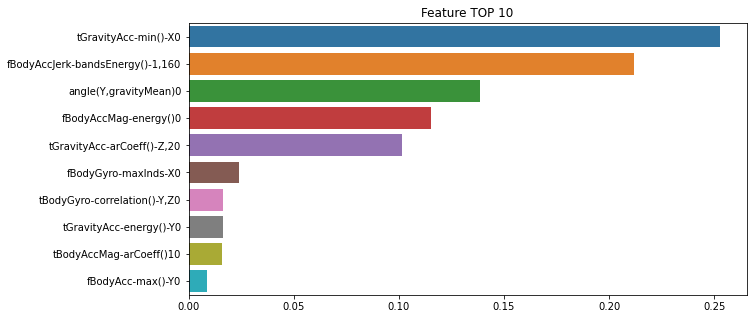

In [119]:
plt.figure(figsize=(10,5))
plt.title('Feature TOP 10')
sns.barplot(x=feature_top10, y=feature_top10.index)
plt.show()
# 561개의 컬럼 중 중요도가 제일 높은 feature 열 개를 출력

# 결정트리 모델 시각화
### Graphviz : 결정트리 시각화 도구

In [137]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

In [139]:
os.environ["PATH"]

'C:\\Anaconda3;C:\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Anaconda3\\Library\\usr\\bin;C:\\Anaconda3\\Library\\bin;C:\\Anaconda3\\Scripts;C:\\Anaconda3;C:\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Anaconda3\\Library\\usr\\bin;C:\\Anaconda3\\Library\\bin;C:\\Anaconda3\\Scripts;C:\\Program Files (x86)\\Intel\\iCLS Client\\;C:\\Program Files\\Intel\\iCLS Client\\;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Program Files\\Intel\\WiFi\\bin\\;C:\\Program Files\\Common Files\\Intel\\WirelessCommon\\;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\Users\\pc\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Program Files\\Intel\\WiFi\\bin\\;C:\\Program Files\\C

In [133]:
# 파일을 따로 다운로드 : grapviz.org
# 경로를 일일이 지정해 줄 필요가 없기 때문
# 파일 다운 받은 후 install
# !pip install graphviz

In [145]:
from sklearn.tree import export_graphviz
export_graphviz(best_dt_HAR, out_file="tree.dot", # best_dt_HAR 을 그래프로 시각화 하기
                class_names=label_name, feature_names=feature_name,
               impurity=True, filled=True) # 사각형으로 만들어 줌

In [146]:
import graphviz

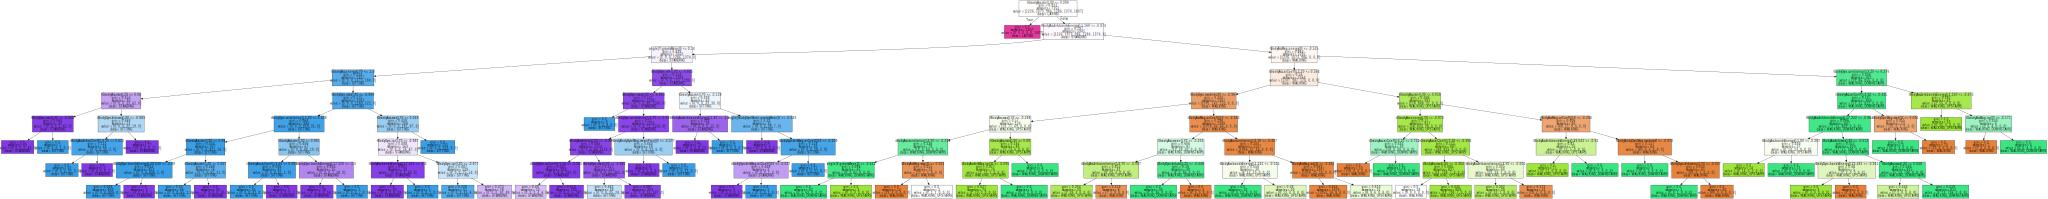

In [147]:
# tree.dot 파일이 생성 --> (export_graphviz 의 실행 결과 저장)

# 파일 열기
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)